# Churn Analysis

### We can classify customer churn (also known as customer attrition) by grouping them into different categories. 
#### Contractual Churn, which is applicable to businesses such as cable companies and SAAS service providers, is when customers decide not to continue with their expired contracts.
#### Voluntary Churn, on the other hand, is when a customer decides to cancel their existing service, which can be applicable for companies such as prepaid cellphones and streaming subscription providers.
#### There are also times when consumers leave a possible purchase without completing the transaction. We can categorize these instances as non-contractual churn, which is applicable for businesses that rely on retail locations, online stores or online borrowing services.
#### And lastly, there is the involuntary churn, for instance where a customer can not pay their credit card bill and no longer stays with the credit card company.

#### Importing necessary Python Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading dataset

In [30]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Checking of Null Values and Datatypes

In [3]:
# Looking for missing data
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

RowNumber
False    10000
Name: RowNumber, dtype: int64

CustomerId
False    10000
Name: CustomerId, dtype: int64

Surname
False    10000
Name: Surname, dtype: int64

CreditScore
False    10000
Name: CreditScore, dtype: int64

Geography
False    10000
Name: Geography, dtype: int64

Gender
False    10000
Name: Gender, dtype: int64

Age
False    10000
Name: Age, dtype: int64

Tenure
False    10000
Name: Tenure, dtype: int64

Balance
False    10000
Name: Balance, dtype: int64

NumOfProducts
False    10000
Name: NumOfProducts, dtype: int64

HasCrCard
False    10000
Name: HasCrCard, dtype: int64

IsActiveMember
False    10000
Name: IsActiveMember, dtype: int64

EstimatedSalary
False    10000
Name: EstimatedSalary, dtype: int64

Exited
False    10000
Name: Exited, dtype: int64



In [4]:
# checking for missing values as well as datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Checking the summary statistics

In [5]:
# looking at the summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Basic EDA

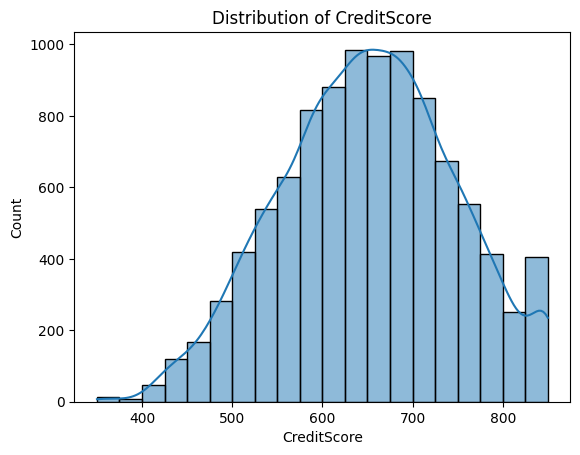

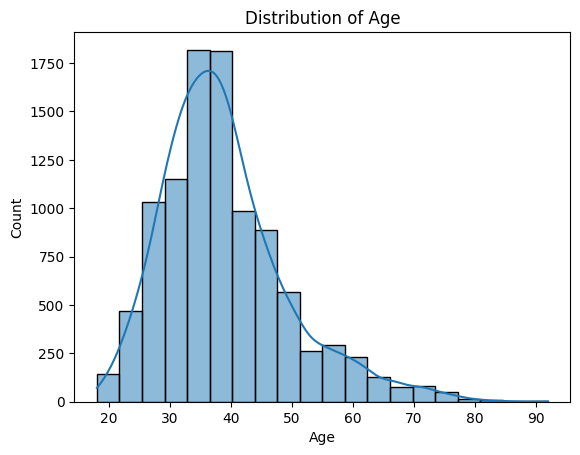

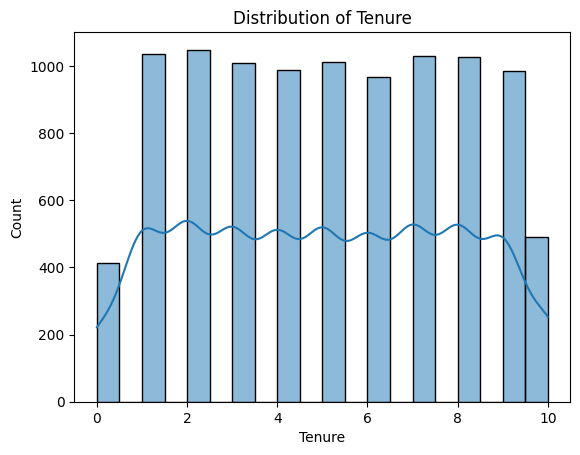

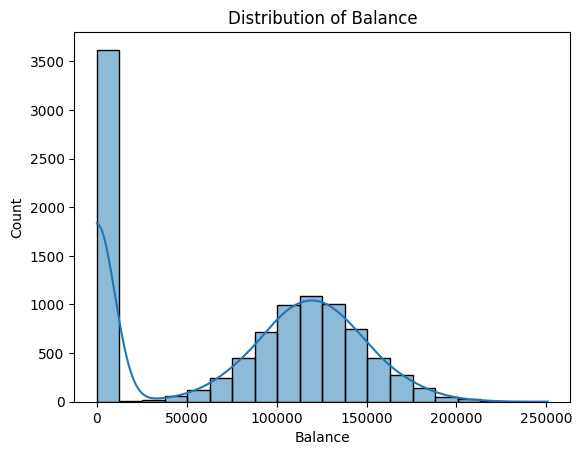

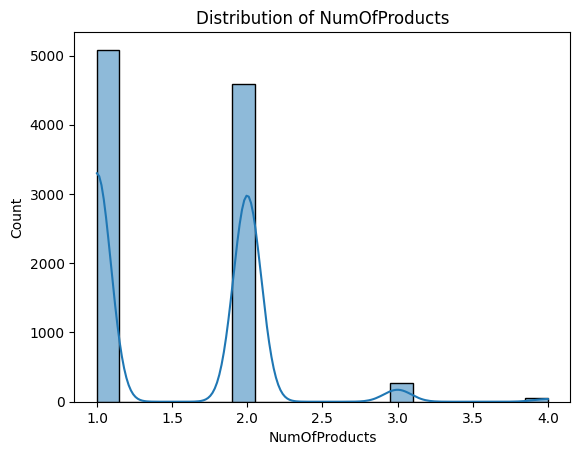

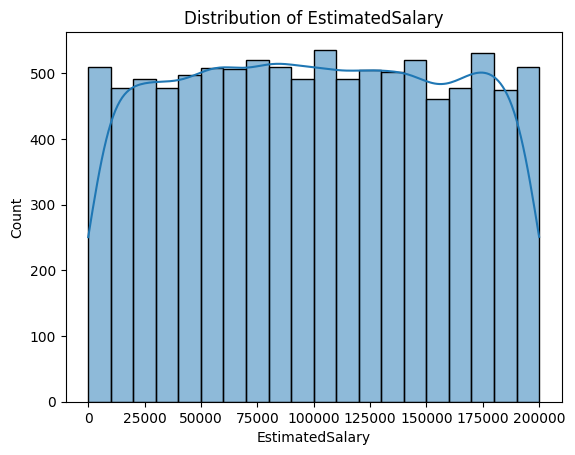

In [6]:
# Data distribution - Numerical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for col in numerical_columns:
    plt.figure()
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [7]:
df['Geography']

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

<AxesSubplot: xlabel='Geography', ylabel='count'>

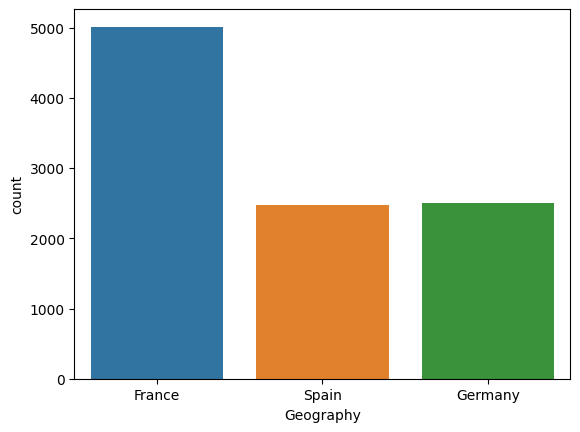

In [8]:
sns.countplot(x = df['Geography'])

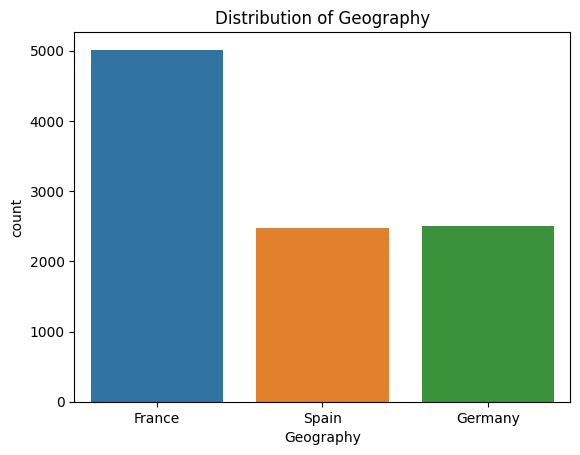

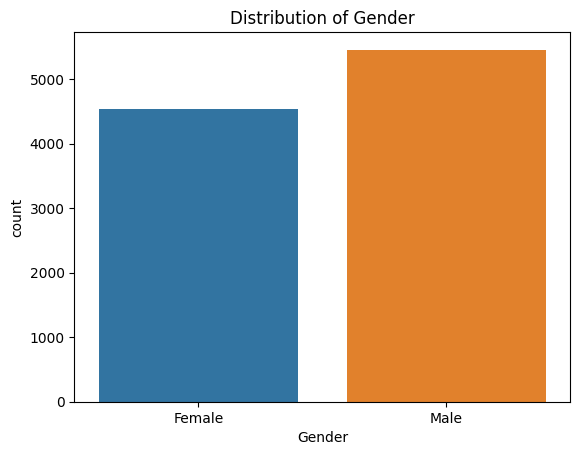

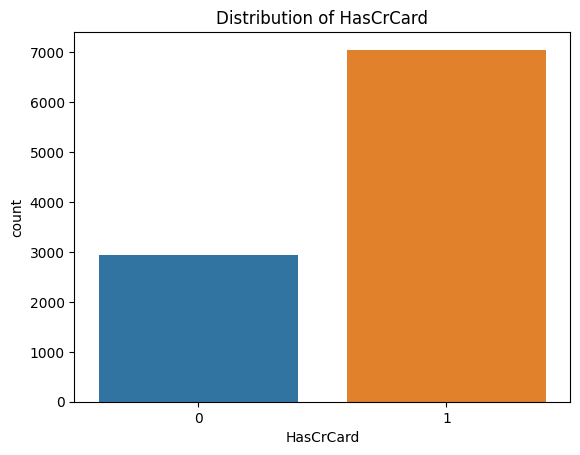

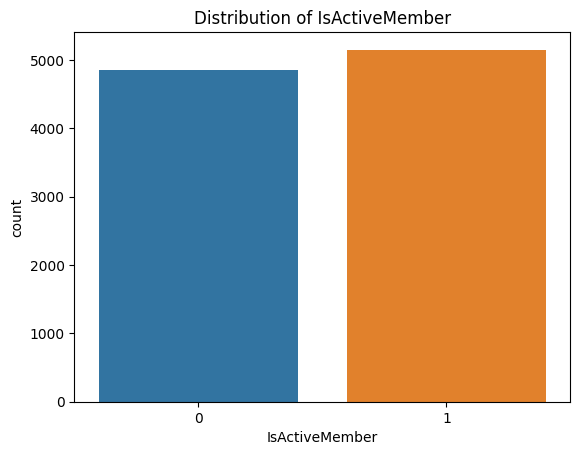

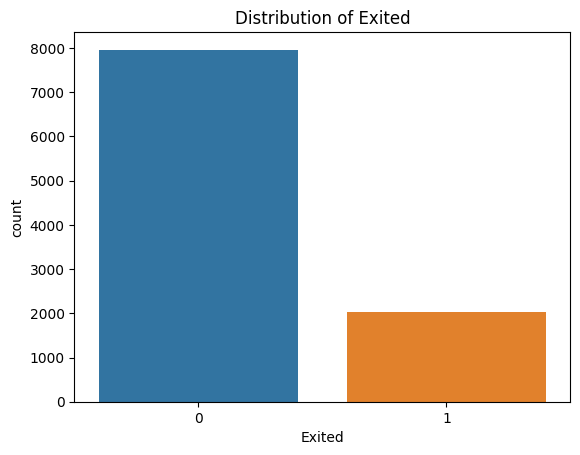

In [9]:
# Categorical variables
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in categorical_columns:
    plt.figure()
    sns.countplot(x = df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

Text(48.429006944444424, 0.5, 'Estimated Salary')

<Figure size 2000x2000 with 0 Axes>

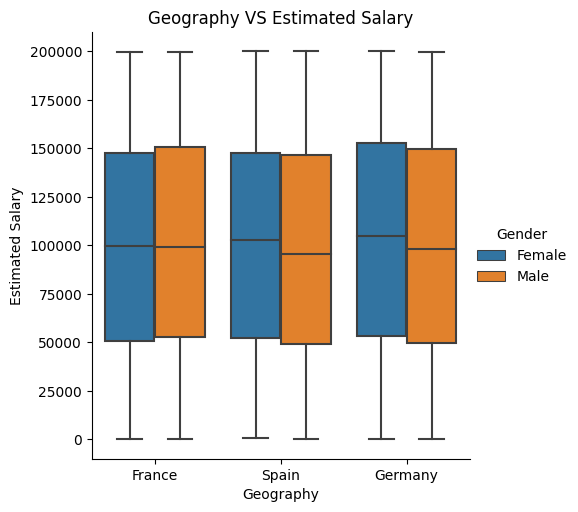

In [10]:
# Looking at Geography and Gender Distribution against Estimated Salary
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue="Gender", kind="box", data=df)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")

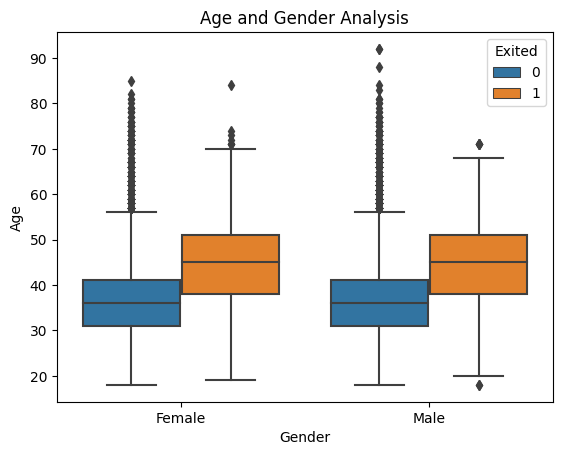

In [11]:
# Gender and Age analysis
plt.figure()
sns.boxplot(x='Gender', y='Age', hue='Exited', data=df)
plt.title('Age and Gender Analysis')
plt.show()

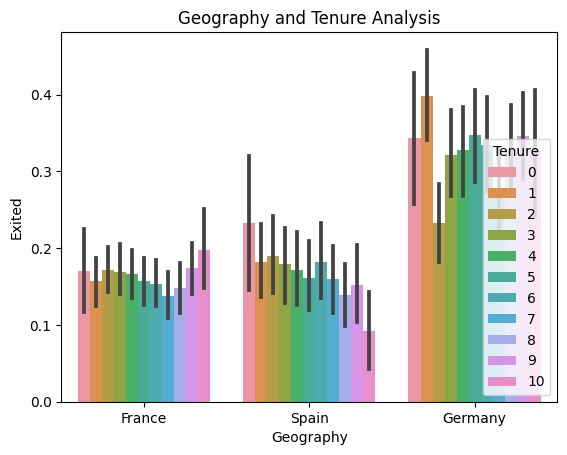

In [12]:
# Geography and Tenure analysis
plt.figure()
sns.barplot(x='Geography', y='Exited', hue='Tenure', data=df)
plt.title('Geography and Tenure Analysis')
plt.show()

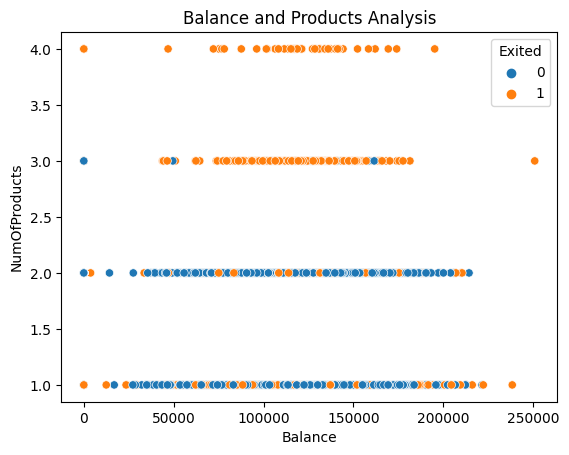

In [13]:
# Balance and Products analysis
plt.figure()
sns.scatterplot(x='Balance', y='NumOfProducts', hue='Exited', data=df)
plt.title('Balance and Products Analysis')
plt.show()

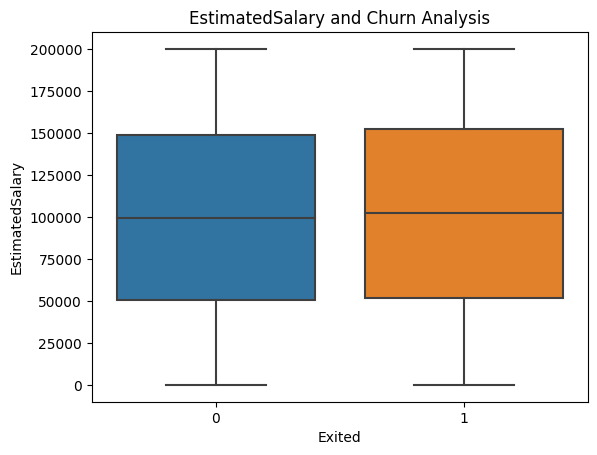

In [14]:
# Salary and Churn analysis
plt.figure()
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('EstimatedSalary and Churn Analysis')
plt.show()


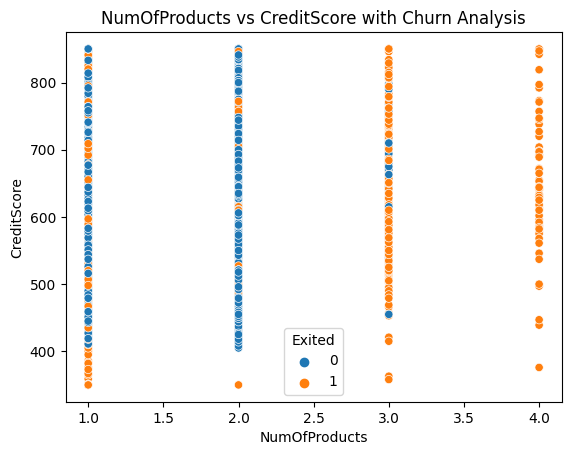

In [15]:
# Feature Interactions - NumOfProducts and CreditScore
plt.figure()
sns.scatterplot(x='NumOfProducts', y='CreditScore', hue='Exited', data=df)
plt.title('NumOfProducts vs CreditScore with Churn Analysis')
plt.show()

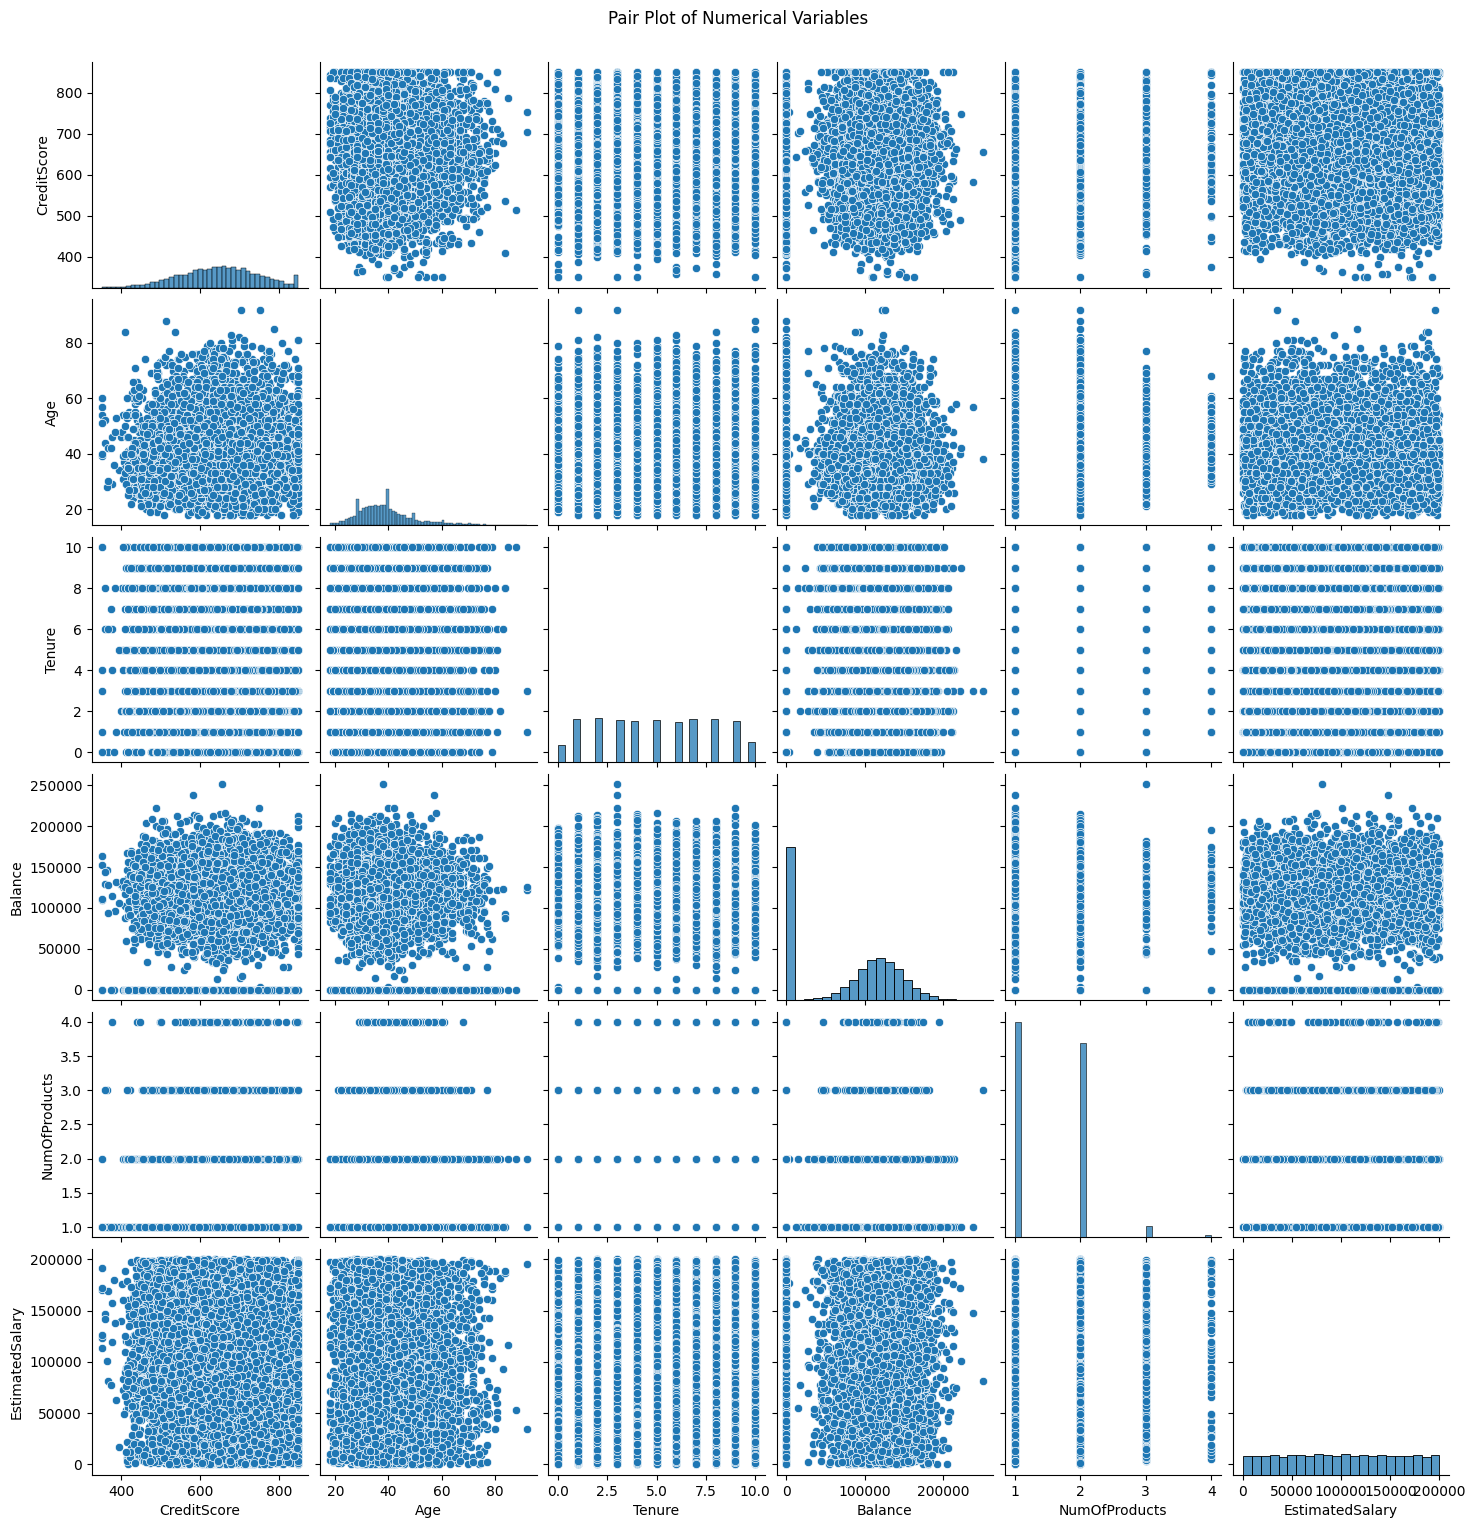

In [16]:
# Data Visualization - Pair Plot
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

In [31]:
df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23912\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


C:\Users\DELL\AppData\Local\Temp\ipykernel_23912\3761274121.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


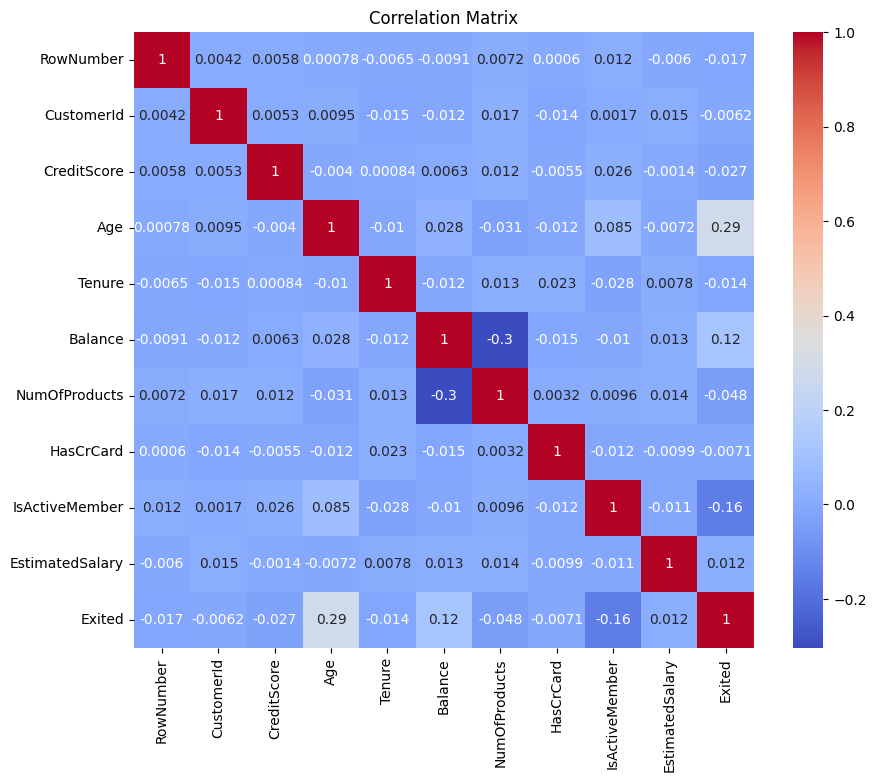

In [17]:
# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#label encoding is for ordinal data
#onehot encoding is for non-ordinal data

In [18]:

one_hot_encoded_data = pd.get_dummies(df, columns = ['Geography', 'Gender'])

In [19]:
one_hot_encoded_data

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [33]:
X = one_hot_encoded_data[['CreditScore','Age','Tenure','NumOfProducts','EstimatedSalary','Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']]
y = df['Exited']

In [34]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [35]:
X

,CreditScore,Age,Tenure,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,1,101348.88,1,0,0,1,0
1,608,41,1,1,112542.58,0,0,1,1,0
2,502,42,8,3,113931.57,1,0,0,1,0
3,699,39,1,2,93826.63,1,0,0,1,0
4,850,43,2,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,2,96270.64,1,0,0,0,1
9996,516,35,10,1,101699.77,1,0,0,0,1
9997,709,36,7,1,42085.58,1,0,0,1,0
9998,772,42,3,2,92888.52,0,1,0,0,1


In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [24]:
# split train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [25]:
model = RandomForestClassifier(n_estimators=101)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=101)

In [26]:
y_pred = model.predict(X_test)


In [36]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print (acc)

0.863


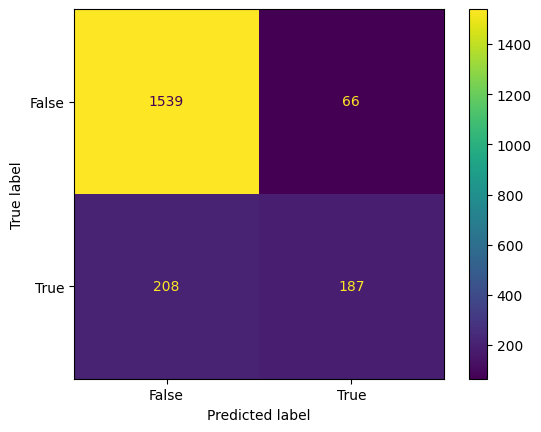

In [28]:
#from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()